__1. Обучите нейронную сеть на TensorFlow 2 на датасете Boston Housing dataset. Опишите, что помогло вам улучшить ее точность?__

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [3]:
print(f"Размерность x_train: {x_train.shape}")
print(f"Размерность y_train: {y_train.shape}")
print(f"Количество пустых значений x_train: {np.isnan(x_train).sum()}")
print(f"Количество пустых значений y_train: {np.isnan(y_train).sum()}")

print(f"Размерность x_test: {x_test.shape}")
print(f"Размерность y_test: {y_test.shape}")
print(f"Количество пустых значений x_test: {np.isnan(x_test).sum()}")
print(f"Количество пустых значений y_test: {np.isnan(y_test).sum()}")

Размерность x_train: (404, 13)
Размерность y_train: (404,)
Количество пустых значений x_train: 0
Количество пустых значений y_train: 0
Размерность x_test: (102, 13)
Размерность y_test: (102,)
Количество пустых значений x_test: 0
Количество пустых значений y_test: 0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [5]:
x_input = tf.keras.layers.Input(shape=(x_train_sc.shape[1]))
x_l = tf.keras.layers.Dense(64, activation='tanh')(x_input)
x_output = tf.keras.layers.Dense(1)(x_l)

model = tf.keras.models.Model(x_input, x_output)

model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mae', 'mse'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [6]:
full_history = model.fit(x_train_sc, y_train, epochs=500, verbose=0)
model.evaluate(x_test_sc, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 12.5584 - mae: 2.5063 - mse: 12.5584


[12.558427810668945, 2.5063304901123047, 12.558427810668945]

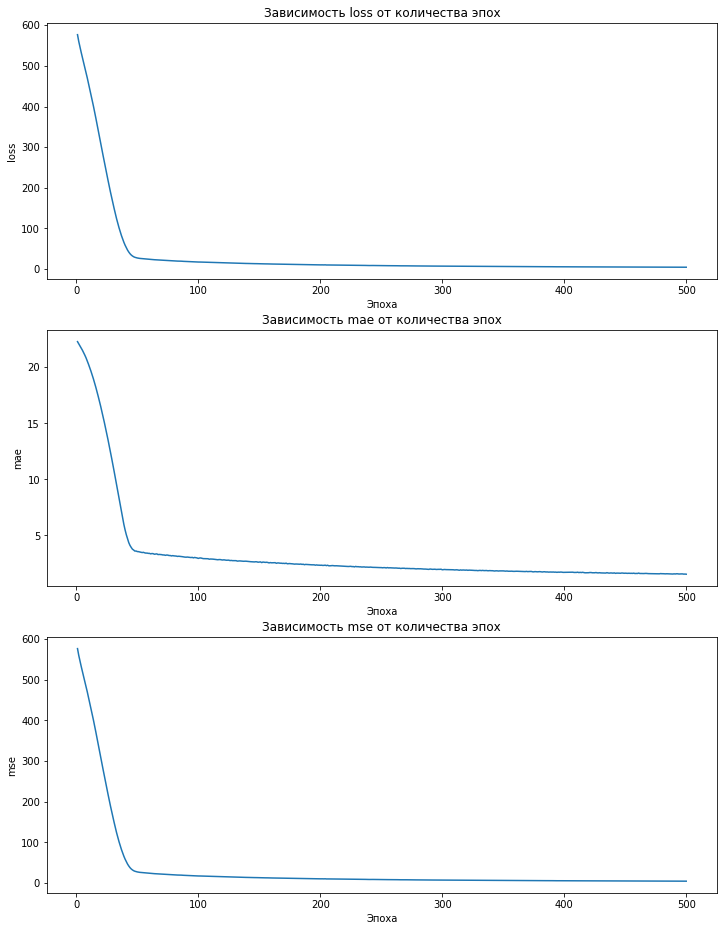

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 16))
for ax, prm in zip(axs, ["loss", "mae", "mse"]):
    ax.plot(range(1, len(full_history.history[prm]) + 1), full_history.history[prm])
    ax.set_title(f"Зависимость {prm} от количества эпох")
    ax.set_xlabel("Эпоха")
    ax.set_ylabel(f"{prm}")

In [8]:
prediction = model.predict(x_test_sc)

In [9]:
from sklearn.metrics import r2_score

r2_score(y_test, prediction)

0.8491368648597797

Улучшить точность сети помог подбор функции активации и оптимизатора, также значительный вклад в точность вносит нормализация.

__2.* Поработайте с документацией TensorFlow 2. Проведите операции: создания, сложени, умножения тензоров. найдите другие операции над тензорами и посмотрите на их результат. Получите содержимое тензоров. (строим 5-10 примеров).__

In [10]:
A = tf.constant([[1, 2, 3, 4], 
                 [5, 6, 7, 8],
                 [9, 10, 11, 12],
                 [13, 14, 15, 16]])

B = tf.constant([[5, 3, 12, 1], 
                 [23, 6, 11, 2]])

C = tf.constant([[1, 3], 
                 [5, 9],
                 [2, 10],
                 [8, 1]])

In [11]:
print(f"Тензор A:\n{A}")

Тензор A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [12]:
A_conc_C = tf.concat([A, C], 1)
print("Объединение тензоров A и C:")
A_conc_C.numpy()

Объединение тензоров A и C:


array([[ 1,  2,  3,  4,  1,  3],
       [ 5,  6,  7,  8,  5,  9],
       [ 9, 10, 11, 12,  2, 10],
       [13, 14, 15, 16,  8,  1]])

In [13]:
C_mult_B = tf.matmul(C, B)
B_mult_C = tf.matmul(B, C)
print(f"Умножение тензора C на B:\n{C_mult_B}")
print(f"Умножение тензора B на C:\n{B_mult_C}")

Умножение тензора C на B:
[[ 74  21  45   7]
 [232  69 159  23]
 [240  66 134  22]
 [ 63  30 107  10]]
Умножение тензора B на C:
[[ 52 163]
 [ 91 235]]


In [14]:
A_1 = tf.cast(A, dtype=tf.float32) # изменение типов данны в float32
A_1_mult_const = tf.multiply(A_1, 0.01)
print(f"Произведение тензора на число:\n{A_1_mult_const}")

Произведение тензора на число:
[[0.01       0.02       0.03       0.04      ]
 [0.05       0.06       0.07       0.08      ]
 [0.09       0.09999999 0.11       0.12      ]
 [0.13       0.14       0.14999999 0.16      ]]


In [15]:
print(f"Сложение матриц A_1 и A_1_mult_const:\n{A_1 + A_1_mult_const}")

Сложение матриц A_1 и A_1_mult_const:
[[ 1.01  2.02  3.03  4.04]
 [ 5.05  6.06  7.07  8.08]
 [ 9.09 10.1  11.11 12.12]
 [13.13 14.14 15.15 16.16]]


In [16]:
print(f"Сложение матриц A_1 и константы:\n{A_1 + 3}")

Сложение матриц A_1 и константы:
[[ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]]
